In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Functions

In [2]:
def age(year):
    age = 2020 - year
    return age

In [3]:
age(1942)

78

In [4]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year))

In [5]:
name_and_age('Joe', 1942)

'Joe is 78'

## Apply

In [6]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [7]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person

In [8]:
greeting('Pam')

'Dunder Mifflin, this is Pam'

In [9]:
greeting('Erin')

'Dunder Mifflin, this is Erin'

In [10]:
staff.apply(greeting, 'Employee')

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [11]:
staff.apply(name_and_age, 'Employee', 'Birth Year')

array(['Jim is 35', 'Dwight is 32', 'Michael is 53', 'Creed is 116'],
      dtype='<U13')

## Prediction ##

In [12]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


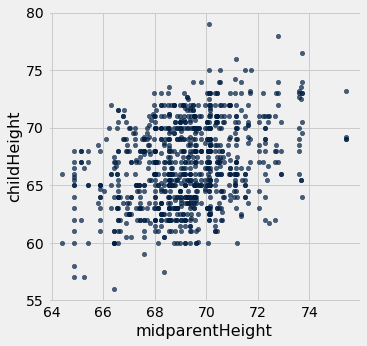

In [13]:
galton.scatter('midparentHeight', 'childHeight')

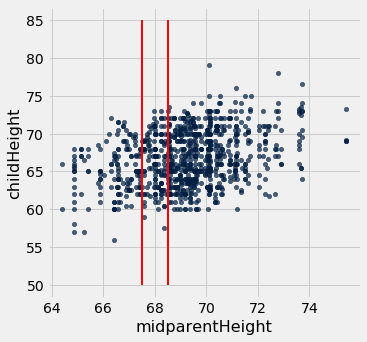

In [14]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [15]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

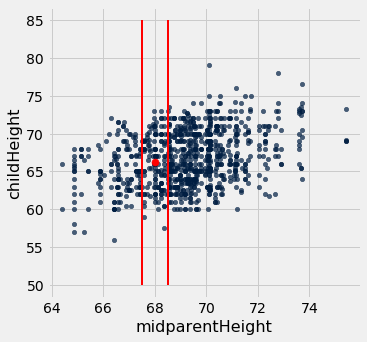

In [16]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [17]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [18]:
predict(68)

66.24045801526718

In [19]:
predict(70)

67.27285067873302

In [20]:
predict(73)

69.5

In [21]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [22]:
galton = galton.with_column('predictedHeight', predicted_heights)

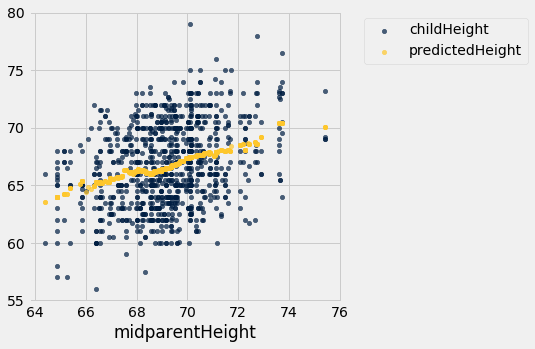

In [23]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [24]:
def difference(x, y):
    return x - y

In [25]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.56850394e+00,
       -2.56850394e+00, -1.56850394e+00, -6.85039370e-02,  3.93149606e+00,
        3.93149606e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.31428571e+00,  1.18571429e+00,  3.18571429e+00,  3.18571429e+00,
        3.16052632e+00, -6.36576087e+00, -2.36576087e+00, -3.65760870e-01,
        6.34239130e-01,  6.34239130e-01,  1.63423913e+00,  4.13423913e+00,
        4.63423913e+00,  2.37410714e+00, -2.22571429e+00,  6.77428571e+00,
        7.74285714e-01,  1.77428571e+00, -2.40769231e+00, -1.90769231e+00,
        1.89230769e+00, -3.92676056e+00, -2.42676056e+00, -2.12676056e+00,
       -2.12676056e+00, -

In [26]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


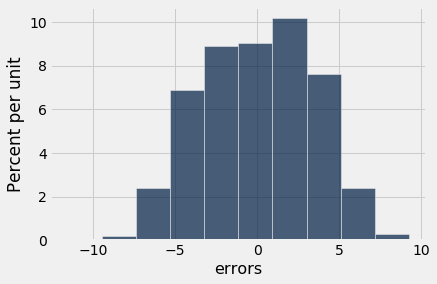

In [27]:
galton.hist('errors')

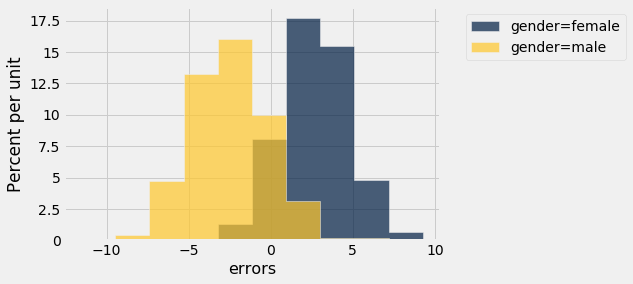

In [28]:
galton.hist('errors', group='gender')

# Discussion Question

In [29]:
def predict_smarter(h, g):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [30]:
predict_smarter(68, 'female')

62.909259259259265

In [31]:
predict_smarter(68, 'male')

68.57662337662337

In [32]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)

In [33]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)

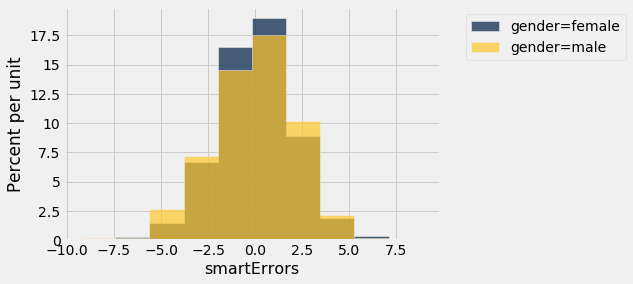

In [34]:
galton.hist('smartErrors', group='gender')

## Grouping by One Column ##

In [35]:
cones = Table.read_table('cones.csv')

In [36]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [37]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [38]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [39]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [40]:
survey = Table.read_table('welcome_survey_v1.csv')

In [41]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Number of textees average,Hours of sleep average,Handedness average,Pant leg average,Sleep position average
1,2.57895,7.21053,,,
2,4.30612,7.10204,,,
3,5.43529,7.12941,,,
4,5.75,7.09398,,,
5,5.92216,7.1488,,,
6,6.52121,7.07576,,,
7,7.79039,7.1441,,,
8,8.6036,7.26577,,,
9,10.8889,7.48889,,,
10,18.6667,7.77778,,,


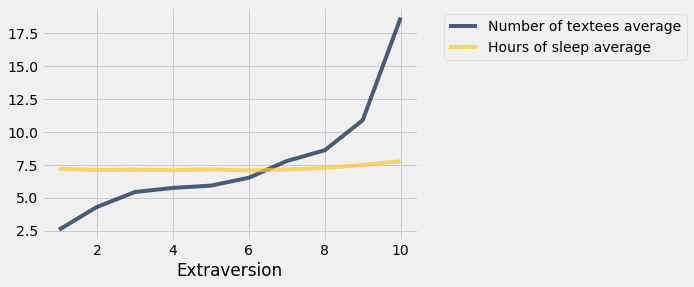

In [42]:
by_extra.select(0,1,2).plot('Extraversion') # Drop the categorical columns

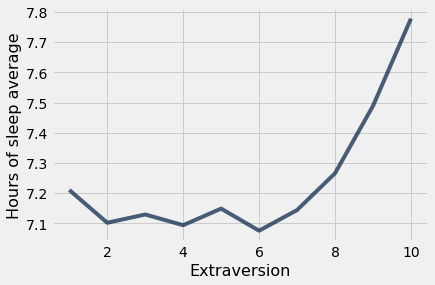

In [43]:
by_extra.select(0,2).plot('Extraversion')

## Lists

In [44]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [45]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

[1, 5, 'hello', 5.0, array([1, 2, 3])]

## Grouping by Two Columns ##

In [46]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,6
Both,On your right side,1
Both,On your stomach,1
Left-handed,On your back,30
Left-handed,On your left side,28
Left-handed,On your right side,28
Left-handed,On your stomach,13
Right-handed,On your back,288
Right-handed,On your left side,310


## Pivot Tables

In [47]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,6,1,1
Left-handed,30,28,28,13
Right-handed,288,310,394,188


In [48]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,2.75,5.16667,9,8
Left-handed,5.66667,5.25,5.03571,5.69231
Right-handed,5.31597,5.57742,5.67766,5.8617


In [49]:
survey.group('Handedness', np.average)

Handedness,Extraversion average,Number of textees average,Hours of sleep average,Pant leg average,Sleep position average
Both,4.91667,5.33333,6.79167,,
Left-handed,5.37374,6.58586,7.1596,,
Right-handed,5.59237,6.88729,7.1664,,
